# Exploratory Data Analysis and Logistic Regression model on Titanic Dataset from kaggle on prediction of surviving of person on basis of his age or passenger class and other parameters

### importing some libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### taking data from https://github.com/krishnaik06/EDA1/blob/master/titanic_train.csv this csv file by downloading it

In [2]:
df = pd.read_csv("titanic_data.csv")
df.head()
# Embarked is the column which describes from where the passenger mount on ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### SibSp is the column which contains number of siblings like brother or sister or spouse like husband or wife are there of that particular person

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Let's start our exploratory data analysis by checking how many missing values are there in this dataset

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
## There are null/NaN values in age and cabin column

In [6]:
## we can visualize missing values by watching it's graph through seaborn

<AxesSubplot:>

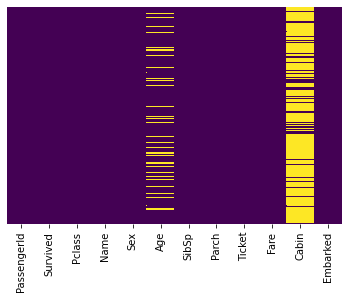

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

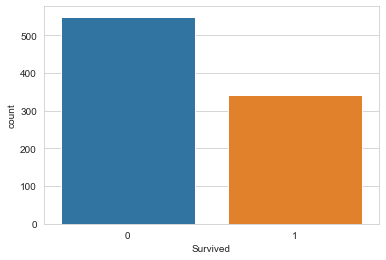

In [8]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=df)
# number of people survived or not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

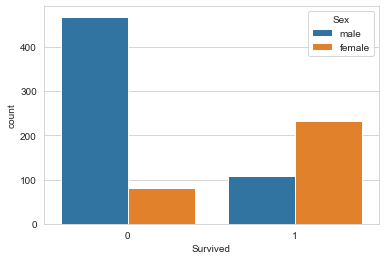

In [9]:
# number of people survived or not on basis of sex(male or female)
sns.countplot(x="Survived",data=df,hue="Sex")

In [10]:
# as peoples have given first priority for females and childrens to save their life more females are survived
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

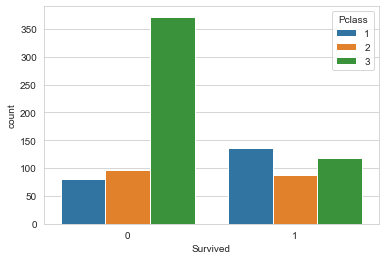

In [11]:
sns.countplot(x="Survived",data=df,hue="Pclass")
# a lot of passengers from 3 rd class failed to survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

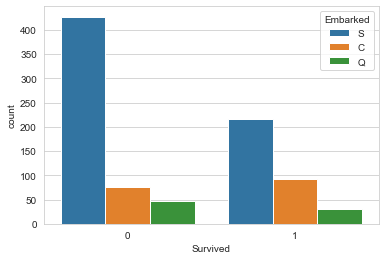

In [12]:
sns.countplot(x="Survived",data=df,hue="Embarked")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

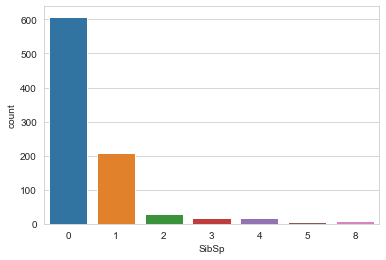

In [13]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:>

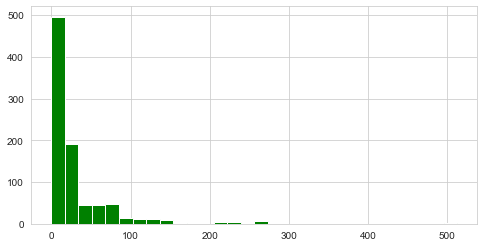

In [14]:
df["Fare"].hist(bins=30,color="green",figsize=(8,4))

# Now we will try to remove all null i.e., NA values from columns

<AxesSubplot:>

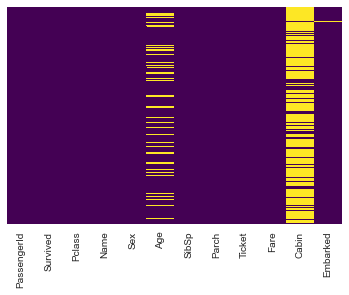

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [16]:
## try to find some relation in null value column and another column having no null values

<AxesSubplot:>

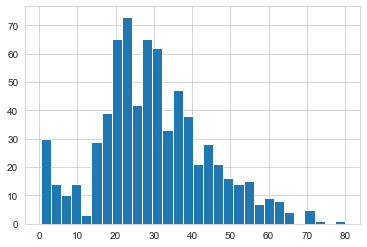

In [17]:
df["Age"].dropna().hist(bins=30)
## dropna drop NaN or null values

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

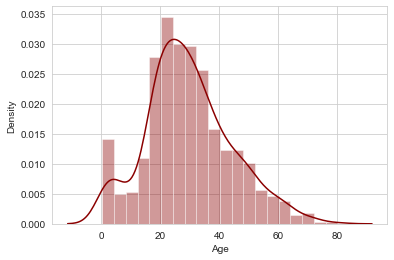

In [18]:
sns.distplot(df["Age"].dropna(),color="darkred")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

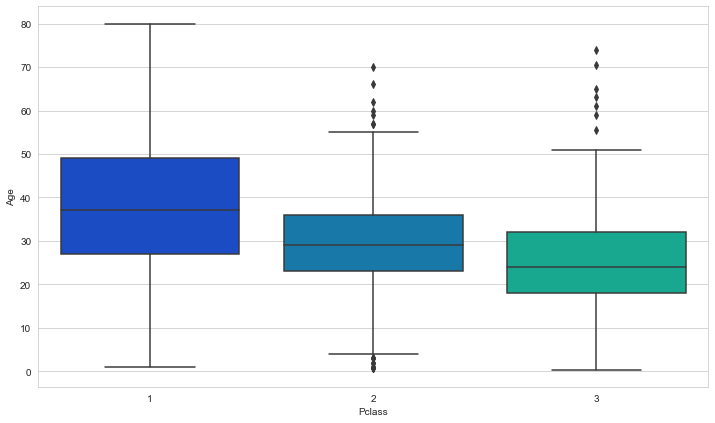

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=df, palette="winter")

In [20]:
## it looks like age is quite dependent on passenger class and we can fill null values of Age column by their passenger class
## average values of age for different Pclasses => 1-36 2-29 3-24

In [21]:
## creating a function to replace null value from Age column
def replace_age(lst):
    age = lst[0]
    pclass = lst[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 36
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age

In [22]:
df["Age"] = df[["Age","Pclass"]].apply(replace_age,axis=1)

<AxesSubplot:>

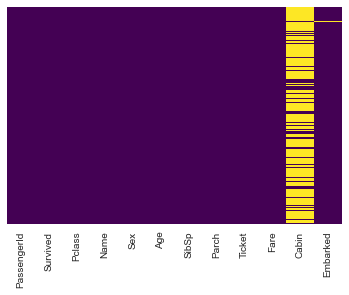

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [24]:
def is_null(a):
    return pd.isnull(a)

In [25]:
df["Embarked"].apply(is_null)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [26]:
df["Embarked"].apply(is_null).sum()

2

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

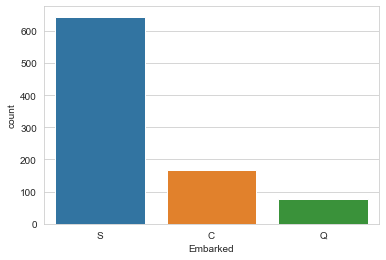

In [27]:
sns.countplot(df['Embarked'])

In [28]:
df["Embarked"][df["Embarked"].apply(is_null)] = 'S'

<ipython-input-28-906af7946c14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"][df["Embarked"].apply(is_null)] = 'S'


In [29]:
df["Embarked"].apply(is_null).sum()

0

In [30]:
df = df.drop(columns='Cabin', axis=1)
df = df.drop(columns='Name', axis=1)
df = df.drop(columns='PassengerId', axis=1)
df = df.drop(columns='Ticket', axis=1)

In [31]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [32]:
dummy = pd.get_dummies(df['Sex'], drop_first=True)

In [33]:
df = pd.concat([df,dummy], axis=1)
df = df.drop(columns="Sex", axis=1)

In [34]:
dummy2 = pd.get_dummies(df['Embarked'], drop_first=True)

In [35]:
df = pd.concat([df,dummy2], axis=1)
df = df.drop(columns="Embarked", axis=1)

In [36]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [37]:
X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [40]:
print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(712, 8), (179, 8), (712,), (179,)


In [41]:
model = LogisticRegression()
model.max_iter = 1000
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [43]:
accuracy_score(y_test, predictions)*100

80.44692737430168